In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
source_name='Crab'
ra=83.633080
dec=22.014500
radius=5.
Tstart='2003-03-15T23:27:40.0'
Tstop='2018-03-16T00:03:15.0'
T_format='isot'
time_bin=10000
time_bin_format='sec'
E1_keV=30.
E2_keV=100.
E1_keV_1=100.
E2_keV_1=300.

instrument='isgri'
product='isgri_lc'
osa_version='OSA10.2'
osa_version11='OSA11.0'

host='www.astro.unige.ch/cdci/astrooda/dispatch-data'



In [3]:
token=input() # token for restricted access server
cookies=dict(_oauth2_proxy=token)
disp=DispatcherAPI(host=host)

In [4]:
T1_utc='2003-03-15T00:00:00.0'
T2_utc='2004-03-15T00:00:00.0'

data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1=T1_utc,
                      T2=T2_utc,
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=10,
                      product_type='Real')

- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T00:00:00.0
T2 2004-03-15T00:00:00.0
E1_keV 30.0
E2_keV 100.0
osa_version OSA10.2
RA 83.63308
DEC 22.0145
detection_threshold 10
instrument isgri
product_type isgri_image
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id IRM9NZT32FE2WFMG
dry_run (False,)
api True
the job has been submitted on the remote server
 - the job is working remotely, please wait status=done - job_id=3563043515513838434  34  

query done succesfully!


In [7]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str5,float64,float64,float64,int64,int64,int64,object
5,Crab,1714.5445556640625,83.63191986083984,22.016624450683594,-32768,2,0,0.0002800000074785203


In [6]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n[0:3]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)
data.dispatcher_catalog_1.table.remove_rows(1)

nrows=len(data.dispatcher_catalog_1.table['src_names'])

In [8]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [ ]:
import numpy as np
for i in range(2003,2018):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    #par_dict={'catalog_selected_objects': u'1,2,3,4', 
    #          'E1_keV': E1_keV, 'E2_keV': E2_keV, 
    #          'osa_version': osa_version, 'T_format': T_format, 'selected_catalog': catalog ,
    #          'T2': T2_utc, 'time_bin': time_bin, 'T1': T1_utc, 'product': product, 'instrument': instrument, 
    #          'radius': radius, 'RA': ra, 'src_name': src_name,  'DEC': dec, 'time_bin_format': time_bin_format}
    #data=disp.get_product(**par_dict)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2003:
        t_30_100=lc['TIME']
        r_30_100=lc['RATE']
        err_30_100=lc['ERROR']
    else:
        t_30_100=np.concatenate((t_30_100,lc['TIME']))
        r_30_100=np.concatenate((r_30_100,lc['RATE']))
        err_30_100=np.concatenate((err_30_100,lc['ERROR']))

        

2003-03-15T00:00:00.0 - 2004-03-15T00:00:00.0
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T00:00:00.0
T2 2004-03-15T00:00:00.0
T_format isot
E1_keV 30.0
E2_keV 100.0
query_type Real
osa_version OSA10.2
RA 83.63308
DEC 22.0145
time_bin 10000
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[5], ["Crab"], [1714.5445556640625], [83.63191986083984], [22.016624450683594], [-32768], [2], [0], [0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U5"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}
instrument isgri
product_type isgri_lc
off_line (False,)
query_status ('new',)
verbose (False,)
sess

In [43]:
data._p_list[0].data_unit[1].data

array([(6285.27680422, 277.5932 , 116.336235, 0.49633917, 120.10254 , 1.092807  , 0.99901897),
       (6285.3880774 , 280.68033, 121.99072 , 0.5053666 , 114.92421 , 1.0594107 , 0.9989996 ),
       (6303.84186248, 274.3594 , 106.13386 , 0.4801391 , 122.61143 , 1.0572898 , 0.99901724),
       (6434.33983932, 273.00735, 126.428604, 0.49385116, 115.9713  , 1.043482  , 0.9989898 ),
       (6450.43312041, 273.41812,  78.2176  , 0.3518818 , 114.17744 , 0.7488594 , 0.99951977),
       (6450.51948043, 275.1225 ,  81.18606 , 0.35896704, 113.75396 , 0.7511495 , 0.99950576),
       (6450.62117025, 269.17612,  79.39495 , 0.2754265 , 114.73415 , 0.61258745, 0.99462575),
       (6450.76591564, 269.4479 ,  79.36085 , 0.34921095, 113.73799 , 0.7605576 , 0.99949586),
       (6451.15233355, 274.12933,  75.019554, 0.36513585, 110.50496 , 0.7322706 , 0.9999994 ),
       (6451.48417401, 273.80356,  98.14861 , 0.38239607, 111.744446, 0.81331444, 0.99939775),
       (6451.55578857, 264.2621 ,  86.036385, 0.38

In [47]:
for i in range(2003,2018):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    #par_dict={'catalog_selected_objects': u'1,2,3,4', 
    #          'E1_keV': E1_keV_1, 'E2_keV': E2_keV_1, 'osa_version': osa_version, 'T_format': T_format, 
    #          'selected_catalog': catalog , 'T2': T2_utc, 'time_bin': time_bin, 'T1': T1_utc, 
    #          'product': product, 'instrument': instrument, 'radius': radius, 'RA': ra, 'src_name': src_name,  
    #          'DEC': dec, 'time_bin_format': time_bin_format}
    #data=disp.get_product(**par_dict)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV_1,
                        E2_keV=E2_keV_1,
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2003:
        t_100_300=lc['TIME']
        r_100_300=lc['RATE']
        err_100_300=lc['ERROR']
    else:
        t_100_300=np.concatenate((t_100_300,lc['TIME']))
        r_100_300=np.concatenate((r_100_300,lc['RATE']))
        err_100_300=np.concatenate((err_100_300,lc['ERROR']))



2003-03-15T00:00:00.0 - 2004-03-15T00:00:00.0
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2003-03-15T00:00:00.0
T2 2004-03-15T00:00:00.0
T_format isot
E1_keV 100.0
E2_keV 300.0
query_type Real
osa_version OSA10.2
RA 83.63308
DEC 22.0145
time_bin 10000
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[5], ["Crab"], [1603.61181640625], [83.63185119628906], [22.015871047973633], [-32768], [2], [0], [0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U5"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}
instrument isgri
product_type isgri_lc
off_line (False,)
query_status ('new',)
verbose (False,)
sessi



query done succesfully!
2011-03-15T00:00:00.0 - 2012-03-15T00:00:00.0
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2011-03-15T00:00:00.0
T2 2012-03-15T00:00:00.0
T_format isot
E1_keV 100.0
E2_keV 300.0
query_type Real
osa_version OSA10.2
RA 83.63308
DEC 22.0145
time_bin 10000
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[5], ["Crab"], [1603.61181640625], [83.63185119628906], [22.015871047973633], [-32768], [2], [0], [0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U5"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}
instrument isgri
product_type isgri_lc
off_line (False,)
query_status ('new

In [50]:
for i in range(2016,2018):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    #par_dict={'catalog_selected_objects': u'1,2,3,4', 'E1_keV': E1_keV_1, 'E2_keV': E2_keV_1, 'osa_version': osa_version11, 'T_format': T_format, 'selected_catalog': catalog , 'T2': T2_utc, 'time_bin': time_bin, 'T1': T1_utc, 'product': product, 'instrument': instrument, 'radius': radius, 'RA': ra, 'src_name': src_name,  'DEC': dec, 'time_bin_format': time_bin_format}
    #data=disp.get_product(**par_dict)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV_1,
                        E2_keV=E2_keV_1,
                        query_type='Real',
                        osa_version='OSA11.0',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2016:
        t_100_300_osa11=lc['TIME']
        r_100_300_osa11=lc['RATE']
        err_100_300_osa11=lc['ERROR']
    else:
        t_100_300_osa11=np.concatenate((t_100_300_osa11,lc['TIME']))
        r_100_300_osa11=np.concatenate((r_100_300_osa11,lc['RATE']))
        err_100_300_osa11=np.concatenate((err_100_300_osa11,lc['ERROR']))



2016-03-15T00:00:00.0 - 2017-03-15T00:00:00.0
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2016-03-15T00:00:00.0
T2 2017-03-15T00:00:00.0
T_format isot
E1_keV 100.0
E2_keV 300.0
query_type Real
osa_version OSA11.0
RA 83.63308
DEC 22.0145
time_bin 10000
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[5], ["Crab"], [1603.61181640625], [83.63185119628906], [22.015871047973633], [-32768], [2], [0], [0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U5"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}
instrument isgri
product_type isgri_lc
off_line (False,)
query_status ('new',)
verbose (False,)
sessi

In [51]:
for i in range(2016,2018):
    T1_utc=str(i)+'-03-15T00:00:00.0'
    T2_utc=str(i+1)+'-03-15T00:00:00.0'
    print(T1_utc,'-',T2_utc)
    #par_dict={'catalog_selected_objects': u'1,2,3,4', 'E1_keV': E1_keV, 'E2_keV': E2_keV, 
    #          'osa_version': osa_version11, 'T_format': T_format, 'selected_catalog': catalog , 
    #          'T2': T2_utc, 'time_bin': time_bin, 'T1': T1_utc, 'product': product, 'instrument': instrument, 
    #          'radius': radius, 'RA': ra, 'src_name': src_name,  'DEC': dec, 'time_bin_format': time_bin_format}
    #data=disp.get_product(**par_dict)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        T1=T1_utc,
                        T2=T2_utc,
                        T_format=T_format,
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        query_type='Real',
                        osa_version='OSA11.0',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)

    crab_lc=data._p_list[0]
    lc=crab_lc.data_unit[1].data
    if i==2016:
        t_30_100_osa11=lc['TIME']
        r_30_100_osa11=lc['RATE']
        err_30_100_osa11=lc['ERROR']
    else:
        t_30_100_osa11=np.concatenate((t_30_100_osa11,lc['TIME']))
        r_30_100_osa11=np.concatenate((r_30_100_osa11,lc['RATE']))
        err_30_100_osa11=np.concatenate((err_30_100_osa11,lc['ERROR']))



2016-03-15T00:00:00.0 - 2017-03-15T00:00:00.0
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
T1 2016-03-15T00:00:00.0
T2 2017-03-15T00:00:00.0
T_format isot
E1_keV 30.0
E2_keV 100.0
query_type Real
osa_version OSA11.0
RA 83.63308
DEC 22.0145
time_bin 10000
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[5], ["Crab"], [1603.61181640625], [83.63185119628906], [22.015871047973633], [-32768], [2], [0], [0.0002800000074785203]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U5"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}
instrument isgri
product_type isgri_lc
off_line (False,)
query_status ('new',)
verbose (False,)
sessio

In [53]:
from math import sqrt,exp
Nbins=30
time=np.linspace(52800,58300,Nbins)
flux_bat=np.zeros(Nbins)
error_bat=np.zeros(Nbins)

dtime=time[1]-time[0]
time_av=time-dtime/2.
j=0

d=np.genfromtxt('Crab_SWIFT_BAT.dat')
tt=d[:,0]
r=d[:,1]
rerr=d[:,2]
k=0
while (j<len(time)):
    while ((tt[k]<time[j])):
        flux_bat[j]=flux_bat[j]+r[k]/(rerr[k])**2
        error_bat[j]=error_bat[j]+1./(rerr[k])**2
        k=k+1
        if (k==len(tt)):
            break
    if (k==len(tt)):
        break
    else:
        j=j+1
for i in range(len(flux_bat)):
    if(error_bat[i]>0.):
        flux_bat[i]=flux_bat[i]/(error_bat[i])
        error_bat[i]=1./sqrt(error_bat[i])
sc_bat=max(flux_bat)


In [54]:
time=np.linspace(52800,58300,Nbins)
flux25=np.zeros(Nbins)
error25=np.zeros(Nbins)
flux50=np.zeros(Nbins)
error50=np.zeros(Nbins)
flux100=np.zeros(Nbins)
error100=np.zeros(Nbins)

dtime=time[1]-time[0]
time_av=time-dtime/2.
j=0

d=np.genfromtxt('CRAB_GBM_occ_fluxhist_auto.txt')
t1=d[:,0]
t2=d[:,1]
f25=d[:,4]
ferr25=d[:,5]
f50=d[:,6]
ferr50=d[:,7]
f100=d[:,8]
ferr100=d[:,9]
tt=(t1+t2)/2.
k=0
while (j<len(time)):
    while ((tt[k]<time[j])):
        flux25[j]=flux25[j]+f25[k]/(ferr25[k])**2
        error25[j]=error25[j]+1./(ferr25[k])**2
        flux50[j]=flux50[j]+f50[k]/(ferr50[k])**2
        error50[j]=error50[j]+1./(ferr50[k])**2
        flux100[j]=flux100[j]+f100[k]/(ferr100[k])**2
        error100[j]=error100[j]+1./(ferr100[k])**2
        k=k+1
        if (k==len(tt)):
            break
    if (k==len(tt)):
        break
    else:
        j=j+1
for i in range(len(flux25)):
    if(error25[i]>0.):
        flux25[i]=flux25[i]/(error25[i])
        error25[i]=1./sqrt(error25[i])
    if(error50[i]>0.):
        flux50[i]=flux50[i]/(error50[i])
        error50[i]=1./sqrt(error50[i])
    if(error100[i]>0.):
        flux100[i]=flux100[i]/(error100[i])
        error100[i]=1./sqrt(error100[i])

sc_gbm25=max(flux25)
sc_gbm50=max(flux50)
sc_gbm100=max(flux100)




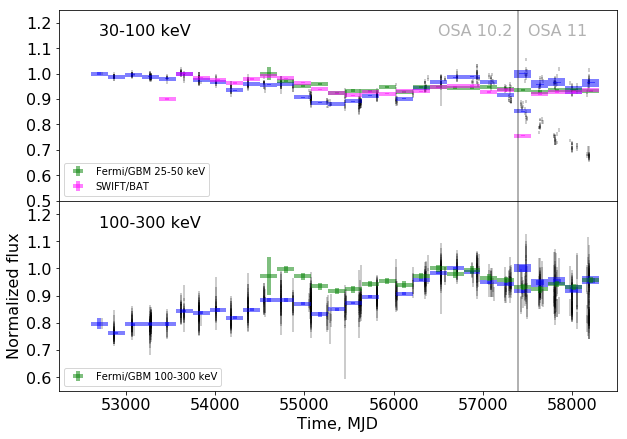

In [56]:
t0=51544

from numpy import exp
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
dtime=time[1]-time[0]
time_av=time-dtime/2.

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1, sharey=ax1)
#ax3 = fig.add_subplot(313,sharex=ax1, sharey=ax1)
fig.subplots_adjust(hspace=0)


j=0
k=0
while (j<len(time)):
    while ((t_30_100[k]+t0<time[j])):
        flux[j]=flux[j]+r_30_100[k]/(err_30_100[k])**2
        error[j]=error[j]+1./(err_30_100[k])**2
        k=k+1
        if (k==len(t_30_100)):
            break
    if (k==len(t_30_100)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
sc=max(flux)
ax1.errorbar(t_30_100+t0,r_30_100/sc,yerr=err_30_100/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax1.errorbar(time_av[:-4],flux[:-4]/sc,yerr=error[:-4]/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=4,alpha=0.5)
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
j=0
k=0
while (j<len(time)):
    while ((t_30_100_osa11[k]+t0<time[j])):
        flux[j]=flux[j]+r_30_100_osa11[k]/(err_30_100_osa11[k])**2
        error[j]=error[j]+1./(err_30_100_osa11[k])**2
        k=k+1
        if (k==len(t_30_100_osa11)):
            break
    if (k==len(t_30_100_osa11)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
sc=max(flux)
ax1.errorbar(t_30_100_osa11+t0,r_30_100_osa11/sc,yerr=err_30_100_osa11/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax1.errorbar(time_av,flux/sc,yerr=error/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=8,alpha=0.5)

j=0
k=0
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
while (j<len(time)):
    while ((t_100_300[k]+t0<time[j])):
        flux[j]=flux[j]+r_100_300[k]/(err_100_300[k])**2
        error[j]=error[j]+1./(err_100_300[k])**2
        k=k+1
        if (k==len(t_100_300)):
            break
    if (k==len(t_100_300)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
sc=max(flux)
ax2.errorbar(t_100_300+t0,r_100_300/sc,yerr=err_100_300/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax2.errorbar(time_av[:-4],flux[:-4]/sc,yerr=error[:-4]/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=4,alpha=0.5)
j=0
k=0
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
while (j<len(time)):
    while ((t_100_300_osa11[k]+t0<time[j])):
        flux[j]=flux[j]+r_100_300_osa11[k]/(err_100_300_osa11[k])**2
        error[j]=error[j]+1./(err_100_300_osa11[k])**2
        k=k+1
        if (k==len(t_100_300_osa11)):
            break
    if (k==len(t_100_300_osa11)):
        break
    else:
        j=j+1
for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])
        error[i]=1./sqrt(error[i])
sc=max(flux)
ax2.errorbar(t_100_300_osa11+t0,r_100_300_osa11/sc,yerr=err_100_300_osa11/sc,linestyle='none',color='black',alpha=0.2,linewidth=2)
ax2.errorbar(time_av,flux/sc,yerr=error/sc,xerr=dtime/2.,linestyle='none',color='blue',linewidth=8,alpha=0.5)


ax1.errorbar(time_av,1.*flux25/sc_gbm25,yerr=error25/sc_gbm25,xerr=dtime/2.,linestyle='none',color='green',alpha=0.5,linewidth=4,label='Fermi/GBM 25-50 keV')
ax1.errorbar(time_av,1.*flux_bat/sc_bat,yerr=error_bat/sc_bat,xerr=dtime/2.,linestyle='none',color='magenta',alpha=0.5,linewidth=4,label='SWIFT/BAT')
ax2.errorbar(time_av,flux100/sc_gbm100,yerr=error100/sc_gbm100,xerr=dtime/2.,linestyle='none',color='green',alpha=0.5,linewidth=4,label='Fermi/GBM 100-300 keV')

plt.ylim(0.55,1.25)
plt.xlim(52250,58500)
ax1.set_ylim(0.55,1.25)


ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax1.set_yticks(np.linspace(0.5,1.2,8))

ax1.axvline(57357+31,color='black',linewidth=2,alpha=0.3)
ax2.axvline(57357+31,color='black',linewidth=2,alpha=0.3)
ax1.text(56500,1.15,'OSA 10.2',fontsize=16,alpha=0.3)
ax1.text(57500,1.15,'OSA 11',fontsize=16,alpha=0.3)

ax1.text(52700,1.15,'30-100 keV',fontsize=16)
ax2.text(52700,1.15,'100-300 keV',fontsize=16)



ax1.legend(loc='lower left')
ax2.legend(loc='lower left')

plt.xlabel('Time, MJD',fontsize=16)
plt.ylabel('Normalized flux',fontsize=16)
plt.savefig('Crab_lc_evolution.pdf',format='pdf',dpi=100)

